In [25]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam, SGD
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

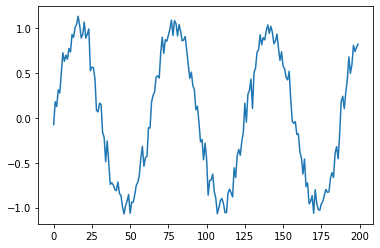

In [26]:
# Make the original data
series = np.sin(0.1 * np.arange(200)) + np.random.randn(200) * 0.1

# Plot it
plt.plot(series)
plt.show()

In [27]:
# Build dataset
T = 10
X = []
Y = []
for t in range(len(series) - T):
    x = series[t:t+T]
    X.append(x)
    y = series[t+T]
    Y.append(y)

X = np.array(X).reshape(-1, T)
Y = np.array(Y)
N = len(X)
print("X.shape", X.shape, "Y.shape", Y.shape, "N", N)

X.shape (190, 10) Y.shape (190,) N 190


In [28]:
# Try autoregressive linear model
i = Input(shape=(T,))
x = Dense(1)(i)
model = Model(i, x)
model.compile(loss="mse", optimizer=Adam(lr=0.1), metrics=["accuracy"])

# Train the model
r = model.fit(X[:-N//2], Y[:-N//2], epochs=80, validation_data=(X[-N//2:], Y[-N//2:]))

Epoch 1/80
3/3 [==============================] - 0s 57ms/step - loss: 3.4775 - accuracy: 0.0000e+00 - val_loss: 0.8924 - val_accuracy: 0.0000e+00
Epoch 2/80
3/3 [==============================] - 0s 12ms/step - loss: 1.1358 - accuracy: 0.0000e+00 - val_loss: 1.2685 - val_accuracy: 0.0000e+00
Epoch 3/80
3/3 [==============================] - 0s 27ms/step - loss: 1.5701 - accuracy: 0.0000e+00 - val_loss: 1.0211 - val_accuracy: 0.0000e+00
Epoch 4/80
3/3 [==============================] - 0s 12ms/step - loss: 0.8116 - accuracy: 0.0000e+00 - val_loss: 0.3872 - val_accuracy: 0.0000e+00
Epoch 5/80
3/3 [==============================] - 0s 11ms/step - loss: 0.3332 - accuracy: 0.0000e+00 - val_loss: 0.3737 - val_accuracy: 0.0000e+00
Epoch 6/80
3/3 [==============================] - 0s 10ms/step - loss: 0.4593 - accuracy: 0.0000e+00

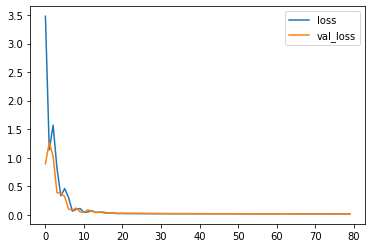

In [29]:
# Loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

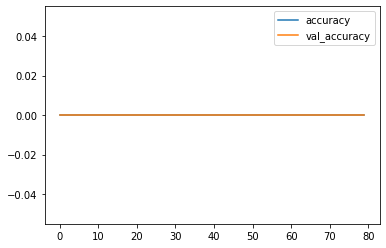

In [30]:
# Accuracy per iteration
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()

In [31]:
# "Wrong" forecast using true targets
validation_target = Y[-N//2:]
validation_predictions = []

# index of first validation input
i = -N//2

while len(validation_predictions) < len(validation_target):
    p = model.predict(X[i].reshape(1, -1))[0, 0]
    i += 1

    # update the predictions list
    validation_predictions.append(p)

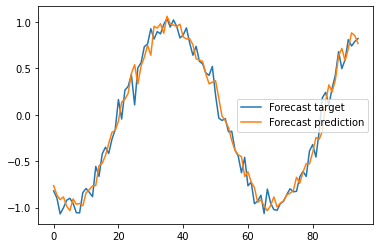

In [32]:
plt.plot(validation_target, label="Forecast target")
plt.plot(validation_predictions, label="Forecast prediction")
plt.legend()

In [33]:
# Forecast future values (use only self-predictions for making future predictions
validation_target = Y[-N//2:]
validation_predictions = []

# index of first validation input
last_x = X[-N//2]

while len(validation_predictions) < len(validation_target):
    p = model.predict(last_x.reshape(1, -1))[0, 0]
    i += 1

    # update the predictions list
    validation_predictions.append(p)

    # make the new input using predicted value
    last_x = np.roll(last_x, -1)
    last_x[-1] = p

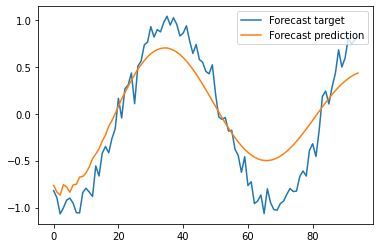

In [34]:
plt.plot(validation_target, label="Forecast target")
plt.plot(validation_predictions, label="Forecast prediction")
plt.legend()